<a href="https://colab.research.google.com/github/yuta-vet/NLP-health-consultation-system/blob/main/veterinary_medicine_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>NLPを用いた受診勧告アルゴリズムの検討</h1>
<p>Robertaというアルゴリズムを用いた自然言語処理技術が、獣医療に使えるか検討してみます。モデルは、<a href="https://huggingface.co/joeddav/xlm-roberta-large-xnli">Joe Davisonという方が公開されているもの</a>を使用します。</p> 
<h3>使い方</h3>
右下のインプットボックスに相談内容を記入してください。記入したのち、上のランタイムというタブからすべてのセルを実行を押してください。結果がセルの下に出てきます。

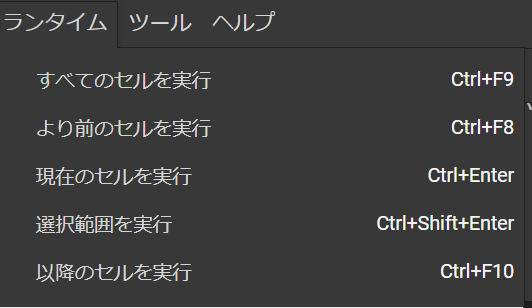


In [ ]:
!pip install -q transformers==3.1.0
from transformers import pipeline;classifier = pipeline("zero-shot-classification", model='joeddav/xlm-roberta-large-xnli')

In [10]:
#@title 相談内容を記入してください。緊急事態かそうでないかを判断します。
text_ = '\u6563\u6B69\u3092\u5ACC\u304C\u308B\u3088\u3046\u306B\u306A\u3063\u305F\u3002' #@param {type:"string"}
candidate_labels = ["緊急事態です", "様子を見ましょう"];result = classifier(text_, candidate_labels);print(result["labels"][0], "\n確率",round(result["scores"][0]*100), "%")

様子を見ましょう 
確率 73 %


In [3]:
#@title 相談内容を記入してください。疾患の種類を推定します。(健康相談を超え、診療要件を満たす可能性が高いので注意)
text__ = '\u8170\u3092\u75DB\u304C\u3063\u3066\u3044\u307E\u3059\u3002\u8DB3\u304C\u9EBB\u75FA\u3057\u3066\u3044\u307E\u3059\u3002' #@param {type:"string"}
candidate_labels = ["消化器系疾患","免疫性疾患","整形学的疾患","泌尿器疾患","呼吸器疾患","神経疾患","循環器疾患","腫瘍","感染症","皮膚疾患","内分泌疾患"];result = classifier(text__, candidate_labels);print("第１位",result["labels"][0], "確率",round(result["scores"][0]*100), "%","\n第２位",result["labels"][1], "確率",round(result["scores"][1]*100), "%","\n第３位",result["labels"][2], "確率",round(result["scores"][2]*100), "%")

第１位 整形学的疾患 確率 53 % 
第２位 神経疾患 確率 34 % 
第３位 呼吸器疾患 確率 5 %
